# Importing Necessary Libraries for Model Building:-

In [15]:
import numpy as np

import pandas as pd

import sklearn

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings('ignore')

# Taking the Dataset for which model buliding is required:-

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [17]:
#Checking the Dataset Shape

df.shape

(31647, 18)

In [18]:
#Finding Null values in Dataset

df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [19]:
#Checking Type of data

df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [20]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [21]:
from sklearn.preprocessing import PowerTransformer
transform=PowerTransformer(method="yeo-johnson")
df['balance']=transform.fit_transform(df[['balance']].values)
df['duration']=transform.fit_transform(df[['duration']].values)
df['campaign']=transform.fit_transform(df[['campaign']].values)
df['previous']=transform.fit_transform(df[['previous']].values)
df.skew()


ID          0.005851
age         0.681607
balance     0.821075
day         0.087185
duration    0.017331
campaign    0.230683
pdays       2.642374
previous    1.661485
dtype: float64

<AxesSubplot:ylabel='Count'>

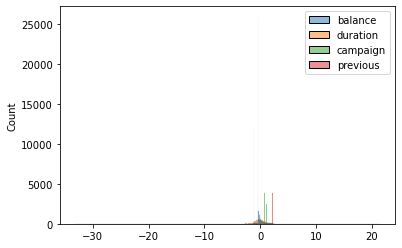

In [22]:
sns.histplot(df[['balance','duration','campaign','previous']])

In [23]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

# The ID,Age,Balance,Duration,Pdays show high no of unique values in order to get high accuracy in model we need to drop those columns

In [24]:
df.drop(['ID', 'age','balance','duration','pdays'], axis=1,inplace=True)
df

,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,19,nov,0.135025,-0.469673,unknown,no
1,unknown,married,secondary,no,no,no,cellular,20,jul,0.135025,-0.469673,unknown,no
2,services,married,secondary,no,yes,no,cellular,18,jul,-1.109239,-0.469673,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,22,jun,-1.109239,2.177812,success,yes
4,technician,married,secondary,no,yes,no,cellular,4,feb,-1.109239,-0.469673,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,12,may,0.135025,-0.469673,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,5,jun,0.135025,-0.469673,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,7,aug,0.738582,-0.469673,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,15,may,1.609201,2.186083,failure,no


In [25]:
df.job.unique

<bound method Series.unique of 0            admin.
1           unknown
2          services
3        management
4        technician
            ...    
31642    management
31643    management
31644    management
31645    technician
31646    management
Name: job, Length: 31647, dtype: object>

# Exploratary Data Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

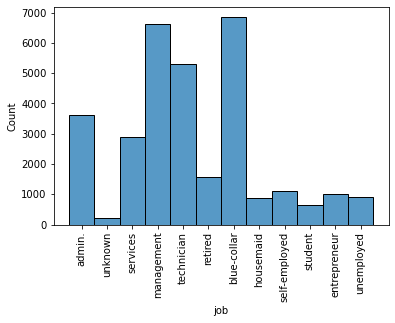

In [26]:
sns.histplot(data=df,x='job',bins=12)
plt.xticks(rotation=90)

#With the above plotting we can understand that Bule color and mangement job holders are high in no and unknown and students are very low in no.

<AxesSubplot:>

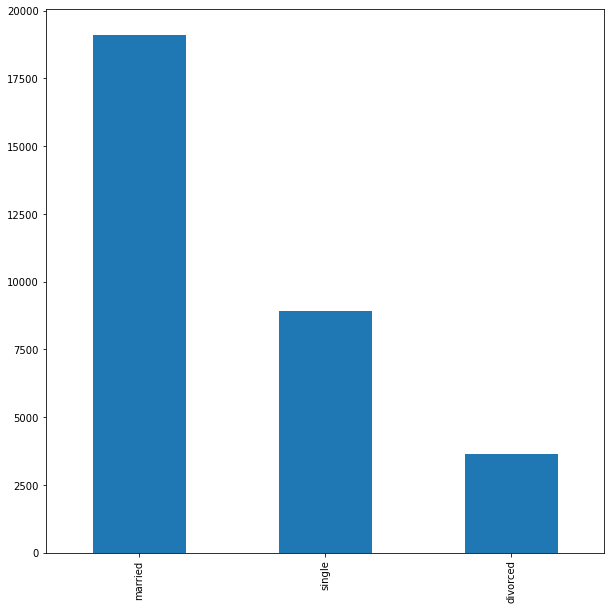

In [27]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
df['marital'].value_counts().plot.bar()

#With the Above graph we can understand that married customers are high in no and divorced customers are low in no

In [28]:
df.education.unique

<bound method Series.unique of 0          unknown
1        secondary
2        secondary
3         tertiary
4        secondary
           ...    
31642     tertiary
31643     tertiary
31644     tertiary
31645    secondary
31646    secondary
Name: education, Length: 31647, dtype: object>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

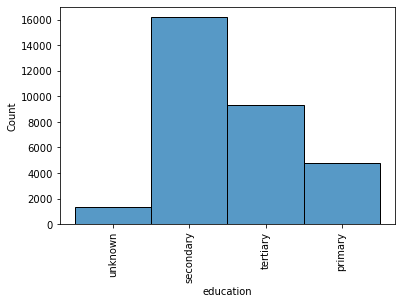

In [29]:
sns.histplot(data=df,x='education',bins=4)
plt.xticks(rotation=90)

#With the above plot customers with secondary education are high no and primary educated customers are low 

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

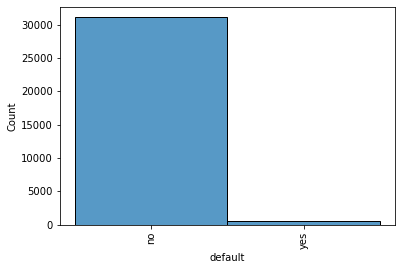

In [30]:
sns.histplot(data=df,x='default',bins=2)
plt.xticks(rotation=90)

#The no of credit defaulters are low

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

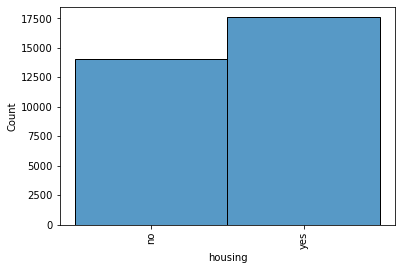

In [31]:
sns.histplot(data=df,x='housing',bins=2)
plt.xticks(rotation=90)

#Customers with own house are high in no

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

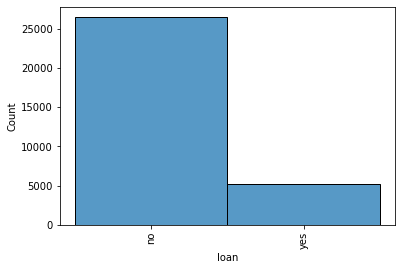

In [32]:
sns.histplot(data=df,x='loan',bins=2)
plt.xticks(rotation=90)

#Customers who took personal loan are very low in no

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

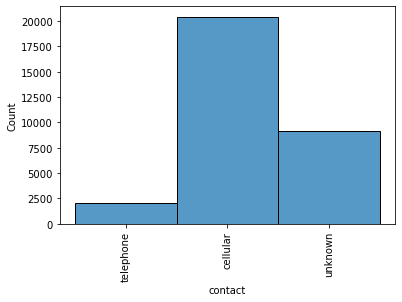

In [33]:
sns.histplot(data=df,x='contact',bins=3)
plt.xticks(rotation=90)

#Customers with mobile phone are high in no so that we can contact them directly and promote our products directly

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

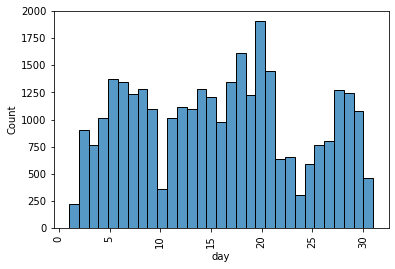

In [34]:
sns.histplot(data=df,x='day',bins=31)
plt.xticks(rotation=90)

#We can contact high no of cutomers in beween 15-20 of a month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

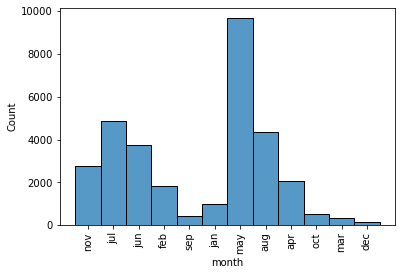

In [35]:
sns.histplot(data=df,x='month',bins=12)
plt.xticks(rotation=90)

#We contact high no of customers in may month very low in the month of December

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

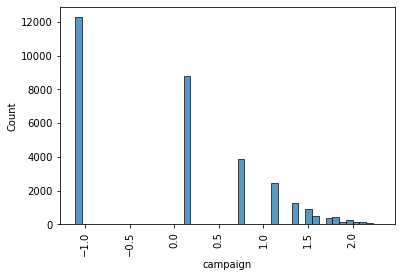

In [36]:
sns.histplot(data=df,x='campaign',bins=45)
plt.xticks(rotation=90)

#we contacted the customers mostly 0-10 times in the the campaign

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

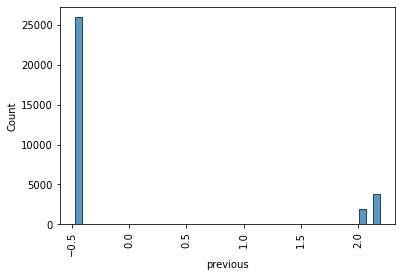

In [37]:
sns.histplot(data=df,x='previous',bins=45)
plt.xticks(rotation=90)

#Previously we contact customer very occationally before this campaign

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

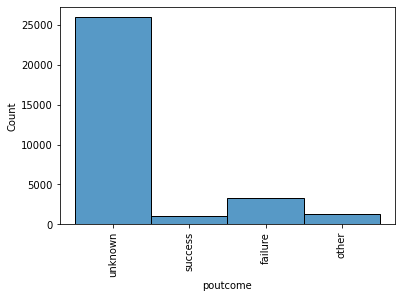

In [38]:
sns.histplot(data=df,x='poutcome',bins=45)
plt.xticks(rotation=90)

#The success rate of previous campaign is verlow

#There are various parameters to be consider weather cutomers are subscribed term deposit or not so we need to bulid suitable model

#In order to get high accuracy we need to convert object data type to into integer  type with the help of Label encoder

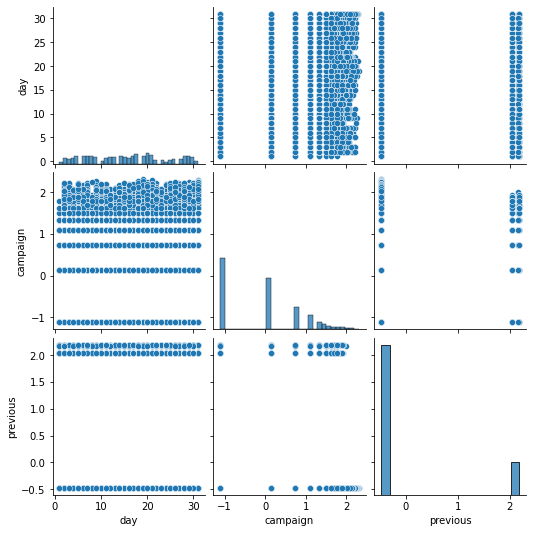

In [39]:
sns.pairplot(df)

In [40]:
df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'campaign', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
le=LabelEncoder()
col=['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
df[col]=df[col].apply(lambda x:le.fit_transform(x))
df

,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome,subscribed
0,0,1,3,0,0,0,1,19,9,0.135025,-0.469673,3,0
1,11,1,1,0,0,0,0,20,5,0.135025,-0.469673,3,0
2,7,1,1,0,1,0,0,18,5,-1.109239,-0.469673,3,0
3,4,0,2,0,0,0,0,22,6,-1.109239,2.177812,2,1
4,9,1,1,0,1,0,0,4,3,-1.109239,-0.469673,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4,2,2,0,1,0,0,12,8,0.135025,-0.469673,3,0
31643,4,0,2,0,0,1,0,5,6,0.135025,-0.469673,3,1
31644,4,2,2,0,0,0,0,7,1,0.738582,-0.469673,3,0
31645,9,1,1,0,1,0,1,15,8,1.609201,2.186083,0,0


#Now the dataset is ready for model buliding Most suitable model is logistic regression hence the out come classfication type i.e- yes/no even though we will build other models to know which is showing high preformance

In [42]:
#Seperating the Label and Target
x=df.iloc[:,0:-1]
x

,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,0,1,3,0,0,0,1,19,9,0.135025,-0.469673,3
1,11,1,1,0,0,0,0,20,5,0.135025,-0.469673,3
2,7,1,1,0,1,0,0,18,5,-1.109239,-0.469673,3
3,4,0,2,0,0,0,0,22,6,-1.109239,2.177812,2
4,9,1,1,0,1,0,0,4,3,-1.109239,-0.469673,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4,2,2,0,1,0,0,12,8,0.135025,-0.469673,3
31643,4,0,2,0,0,1,0,5,6,0.135025,-0.469673,3
31644,4,2,2,0,0,0,0,7,1,0.738582,-0.469673,3
31645,9,1,1,0,1,0,1,15,8,1.609201,2.186083,0


In [43]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [44]:
x.shape


(31647, 12)

In [45]:
y.shape

(31647,)

In [46]:
df['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

#The customer who are subscribed for Term - Deposit low in no and not subscribed is high in no and it is Imblanced Datset

#Hence Dataset is imbalce we need to convert it as balance data set through

In [47]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [48]:
x_train.value_counts()
y_train.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

# Standardizing Data:-

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def vif_calc():
    vif = pd.DataFrame()
    vif["vif Factor"] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [51]:
vif_calc()

    vif Factor   features
0     2.838861        job
1     4.608331    marital
2     3.801471  education
3     1.027288    default
4     2.440198    housing
5     1.202106       loan
6     2.003618    contact
7     4.546041        day
8     5.396390      month
9     1.054525   campaign
10    2.753998   previous
11   14.777286   poutcome


#Applying Standard Scaler:-


In [52]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.324317  , -0.27540549,  2.36922937, ...,  0.135025  ,
        -0.46967334,  0.44177692],
       [ 2.03772948, -0.27540549, -0.30034505, ...,  0.135025  ,
        -0.46967334,  0.44177692],
       [ 0.81516712, -0.27540549, -0.30034505, ..., -1.1092387 ,
        -0.46967334,  0.44177692],
       ...,
       [-0.10175464,  1.37156305,  1.03444216, ...,  0.73858224,
        -0.46967334,  0.44177692],
       [ 1.4264483 , -0.27540549, -0.30034505, ...,  1.60920054,
         2.18608335, -2.61304774],
       [-0.10175464, -1.92237403, -0.30034505, ...,  0.135025  ,
        -0.46967334,  0.44177692]])

In [53]:
xf=pd.DataFrame(data=x)
xf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.324317,-0.275405,2.369229,-0.137234,-1.118201,-0.439893,0.395076,0.379579,1.154007,0.135025,-0.469673,0.441777
1,2.037729,-0.275405,-0.300345,-0.137234,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,0.135025,-0.469673,0.441777
2,0.815167,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,-0.716695,0.259631,-0.177462,-1.109239,-0.469673,0.441777
3,-0.101755,-1.922374,1.034442,-0.137234,-1.118201,-0.439893,-0.716695,0.739422,0.155405,-1.109239,2.177812,-0.576498
4,1.426448,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,-1.109239,-0.469673,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.101755,1.371563,1.034442,-0.137234,0.894294,-0.439893,-0.716695,-0.460055,0.821140,0.135025,-0.469673,0.441777
31643,-0.101755,-1.922374,1.034442,-0.137234,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.135025,-0.469673,0.441777
31644,-0.101755,1.371563,1.034442,-0.137234,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,0.738582,-0.469673,0.441777
31645,1.426448,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,0.395076,-0.100212,0.821140,1.609201,2.186083,-2.613048


In [54]:
# Training the Dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)

In [55]:
x_train.shape

(22152, 12)

In [56]:
x_test.shape

(9495, 12)

In [57]:
y_train.shape

(22152,)

In [58]:
y_test.shape

(9495,)

# LogisticRegression

In [59]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.8908899420747762
[[8284   69]
 [ 967  175]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8353
           1       0.72      0.15      0.25      1142

    accuracy                           0.89      9495
   macro avg       0.81      0.57      0.60      9495
weighted avg       0.87      0.89      0.86      9495



<AxesSubplot:>

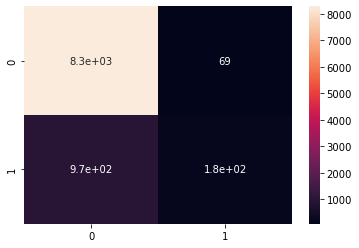

In [61]:
p=confusion_matrix(y_test,pred)
sns.heatmap(p,annot=True)

# Naive Byes ModelBuilding

In [62]:
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [63]:
pred=nb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8151658767772512
[[7353 1000]
 [ 755  387]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8353
           1       0.28      0.34      0.31      1142

    accuracy                           0.82      9495
   macro avg       0.59      0.61      0.60      9495
weighted avg       0.83      0.82      0.82      9495



# SVC Model Building

In [64]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svpr=svr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.8151658767772512
[[7353 1000]
 [ 755  387]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8353
           1       0.28      0.34      0.31      1142

    accuracy                           0.82      9495
   macro avg       0.59      0.61      0.60      9495
weighted avg       0.83      0.82      0.82      9495



In [65]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svpr=svr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8151658767772512
[[7353 1000]
 [ 755  387]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8353
           1       0.28      0.34      0.31      1142

    accuracy                           0.82      9495
   macro avg       0.59      0.61      0.60      9495
weighted avg       0.83      0.82      0.82      9495



In [66]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svpr=svr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8151658767772512
[[7353 1000]
 [ 755  387]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8353
           1       0.28      0.34      0.31      1142

    accuracy                           0.82      9495
   macro avg       0.59      0.61      0.60      9495
weighted avg       0.83      0.82      0.82      9495



# Decision Tree Classifier model building:-

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predictdtc=dtc.predict(x_test)
predictdtc
print(accuracy_score(y_test,predictdtc))
print(confusion_matrix(y_test,predictdtc))
print(classification_report(y_test,predictdtc))

0.8397051079515534
[[7629  724]
 [ 798  344]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8353
           1       0.32      0.30      0.31      1142

    accuracy                           0.84      9495
   macro avg       0.61      0.61      0.61      9495
weighted avg       0.84      0.84      0.84      9495



In [68]:
def testpredict(j):
    j=j.reshape(1,-1)
    pr=dtc.predict(j)
    print(pr)
    if pr ==0:
        print('No')
    elif pr==1:
        print('Yes')

In [69]:
j=np.array([0,1,3,0,0,0,1,19,9,2,0,3])
testpredict(j)

[0]
No


In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
predictdtc=dtc.predict(x_test)
predictdtc
print(accuracy_score(y_test,predictdtc))
print(confusion_matrix(y_test,predictdtc))
print(classification_report(y_test,predictdtc))

0.8395997893628225
[[7632  721]
 [ 802  340]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      8353
           1       0.32      0.30      0.31      1142

    accuracy                           0.84      9495
   macro avg       0.61      0.61      0.61      9495
weighted avg       0.83      0.84      0.84      9495



In [71]:
def testpredict(j):
    j=j.reshape(1,-1)
    pr=dtc.predict(j)
    print(pr)
    if pr ==0:
        print('No')
    elif pr==1:
        print('Yes')

In [72]:
j=np.array([0,1,3,0,0,0,1,19,9,2,0,3])
testpredict(j)

[0]
No


# Hyper parameter tuning:-

In [75]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(df,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'gini'}
1.0
1.0


# KNeighbores Classifier model building:-

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pr=knn.predict(x_test)
print(pr)

[0 0 0 ... 0 0 0]


In [77]:
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.8825697735650342
[[8165  188]
 [ 927  215]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8353
           1       0.53      0.19      0.28      1142

    accuracy                           0.88      9495
   macro avg       0.72      0.58      0.61      9495
weighted avg       0.85      0.88      0.86      9495



# Regularization Models:-

In [78]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=0.00001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.11458306215822234

In [79]:
ls.coef_

array([ 0.00172531,  0.00949027,  0.00830427, -0.00365382, -0.03478193,
       -0.01475699, -0.03013441, -0.0042066 ,  0.0083555 , -0.01985854,
        0.2341829 ,  0.20256666])

Ridge:-

In [80]:
rd=Ridge(alpha=0.00001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.11458310153671203

In [81]:
rd.coef_

array([ 0.00173259,  0.00949718,  0.00830846, -0.00366259, -0.03478624,
       -0.0147629 , -0.03014772, -0.00421675,  0.00837196, -0.01986411,
        0.23433946,  0.20272929])

# Auc Roc Curve-plotting

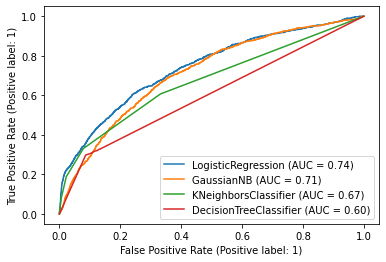

In [82]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(lg,x_test,y_test)

plot_roc_curve(nb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [83]:
#Saving the best performig model;-
import joblib
joblib.dump(lg,'lgfile.obj')

['lgfile.obj']